In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [24]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.info()
red_wine.head()
red_wine.tail()
red_wine.describe()
red_wine.isnull().sum()
red_wine.duplicated().sum()
red_wine = red_wine.drop_duplicates()
red_wine.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1359, 12)

In [3]:
#Let's check how the data is distributed
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [25]:
#Information about the data columns
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [26]:
#checking to see if there's any null variables
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
def label_quality(q):
    if q <= 4:
        return 0  # baja calidad
    elif q <= 6:
        return 1  # calidad media
    else:
        return 2  # buena calidad

red_wine['quality_label'] = red_wine['quality'].apply(label_quality)

In [28]:
red_wine.drop_duplicates(inplace=True)

In [29]:
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,2
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,2
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,1


In [34]:
red_wine['quality_label'].value_counts()

# thats mean 825 have a good quality
0  # baja calidad
1  # calidad media
2  # buena calidad

2

<Axes: xlabel='quality_label', ylabel='count'>

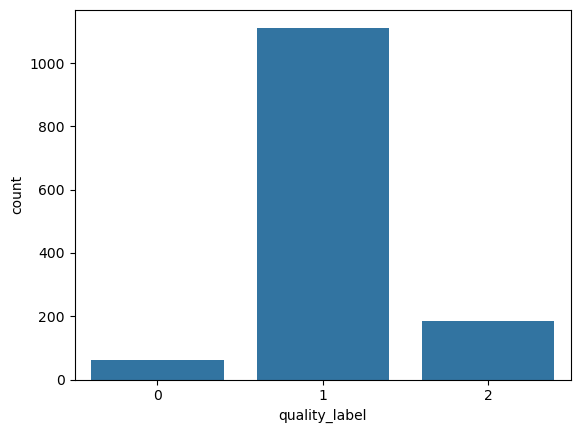

In [36]:
sns.countplot(x='quality_label', data=red_wine)


In [38]:
#Now seperate the dataset as response variable and feature variabes
X = red_wine.drop(['quality', 'quality_label'], axis=1)
y = red_wine['quality_label']

In [39]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
#Applying Standard sclaing to get optimized restult

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
X_train[:10]

array([[ 0.35162311, -0.82832312,  0.64877105, -0.23844033, -0.41160622,
        -0.3620704 , -0.56629785, -0.98661183, -0.25982192,  0.51985077,
         1.98424001],
       [-0.98154785,  0.96589124, -0.98983279,  0.05458922,  0.31279969,
        -0.16847939, -0.59634157, -0.02550786,  0.85726724, -0.45848943,
        -0.2158671 ],
       [-0.86561994,  0.18092246, -1.24586464, -0.60472726, -0.10659321,
         0.21870263, -0.35599181,  0.05503158,  0.85726724, -0.17074231,
        -0.39920936],
       [-0.51783621,  0.85375285, -0.58018183, -0.53146987, -0.22097309,
        -0.3620704 , -0.23581694,  0.53826821,  1.25153401,  0.23210366,
        -0.49088049],
       [-0.2859804 ,  0.34913006, -0.47776909, -0.16518294, -0.25909972,
         0.12190713,  0.21483885,  0.43088229,  0.79155612, -0.40094001,
        -0.39920936],
       [-1.44525949, -1.33294591, -0.06811813, -0.60472726, -0.50692279,
        -1.23322994, -1.07704107, -2.79069527,  0.52871161, -0.68868712,
         2.809

# Forest Classifier

In [43]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


In [44]:
#Let's see how our model performed
print(classification_report(y_test, pred_fc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.86      0.99      0.92       223
           2       0.82      0.41      0.55        34

    accuracy                           0.86       272
   macro avg       0.56      0.47      0.49       272
weighted avg       0.81      0.86      0.82       272



/opt/anaconda3/envs/CodeAcademy/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/CodeAcademy/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/CodeAcademy/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

# Random forest gives the accuracy of 77%

In [49]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)

cm

0.7720588235294118

In [46]:
print("Train accuracy:", rfc.score(X_train, y_train))
print("Test accuracy:", rfc.score(X_test, y_test))

Train accuracy: 0.8647654093836247
Test accuracy: 0.7720588235294118


# Logistic Regresion gives the accuracy of 61%

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
print("Test Accuracy:", lr.score(X_test, y_test))


Test Accuracy: 0.6176470588235294


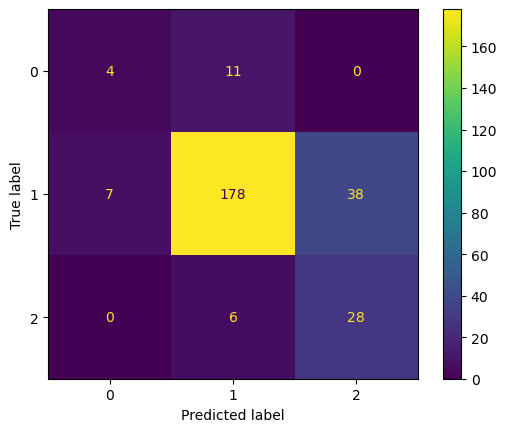

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)